In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
# installation note: 
# use conda virtual env
# choose developer install here: https://github.com/fastai/fastai

import numpy as np
np.random.seed(42)
path = 'food-3'
# data = ImageDataBunch.from_folder(path,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [3]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dumpling', 'non-food', 'soup'], 3, 4842, 1688)

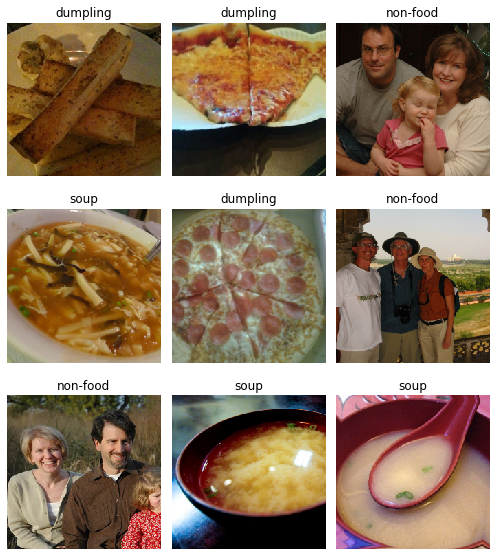

In [4]:
data.show_batch(rows=3, figsize=(7,8))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.046822,0.637483,0.104265,01:07
1,0.083203,0.074984,0.027844,01:06
2,0.049585,0.049675,0.014810,01:06
3,0.027192,0.043176,0.014218,01:06


In [21]:
interp = ClassificationInterpretation.from_learner(learn)

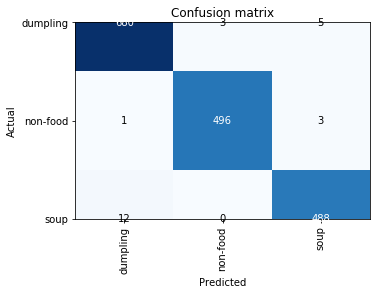

In [22]:
interp.plot_confusion_matrix()

In [23]:
learn.save('stage-1')

In [24]:
learn.load('stage-1');

In [25]:
learn.unfreeze()


In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


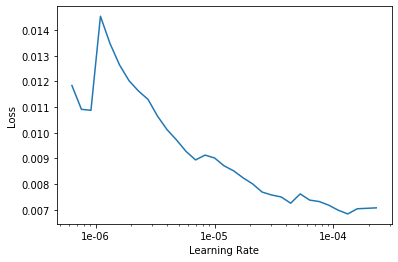

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, max_lr=slice(2e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.019740,0.052360,0.016588,01:06
1,0.015869,0.041987,0.013033,01:07


In [29]:
learn.save('stage-2')  ## classifier has 1.1% error rate

In [30]:
### Interpretation
learn.load('stage-2');  # suppress output with semicolon

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

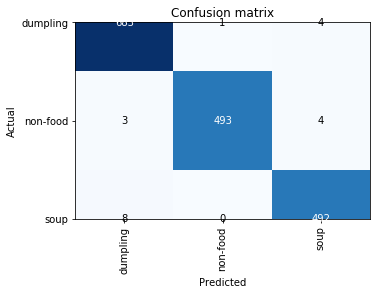

In [18]:
interp.plot_confusion_matrix()

In [32]:
## check dataset integrity
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [24]:
# create new learner with all the data
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [33]:
# now use this to delete photos from dataset
ImageCleaner(ds, idxs, path)

NameError: name 'ImageCleaner' is not defined

### export

In [34]:
learn.export()  # creates export.pkl

In [35]:
defaults.device = torch.device('cpu')  # try inference with cpu


In [36]:
print(path)
learn = load_learner(path)  # path needs to include export.pkl

food-3


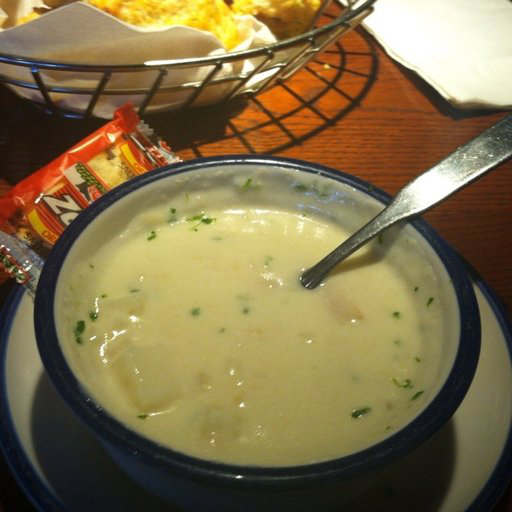

In [37]:
# img = open_image(path/'test'/'soup'/'soup_10.jpg')
img = open_image(path + '/test/soup/soup_10.jpg')
img

In [38]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category soup